In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
flightsinfo = pd.read_csv(r"c:\Users\Hites\OneDrive\Desktop\CDAC 2024\Project\Sample\Sample_Final_Data.csv")

# Count the number of scheduled departures per year
scheduled_departures = flightsinfo.groupby("Year")["CRSDepTime"].count().reset_index()

# Rename column for clarity
scheduled_departures.columns = ["Year", "Total_Scheduled_Departures"]

# Display the result
print(scheduled_departures)


   Year  Total_Scheduled_Departures
0  2018                        9815
1  2019                        9769
2  2020                        9376
3  2021                        9811
4  2022                        9646


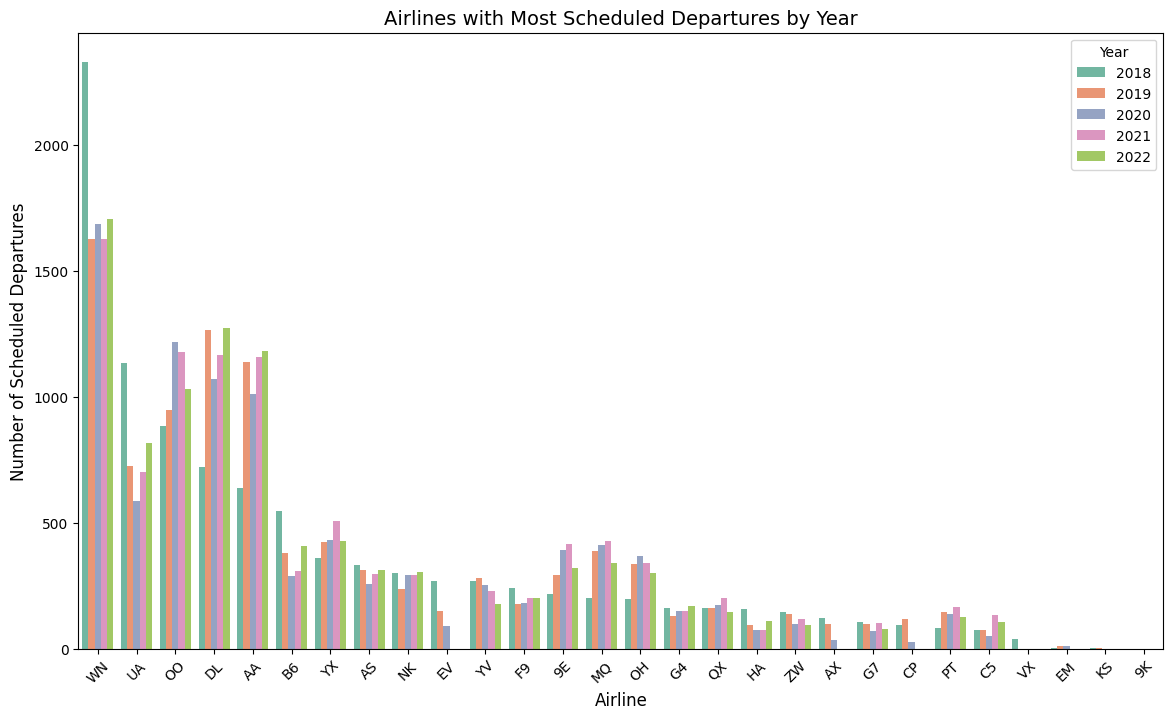

In [87]:
# Group by Year and Operating_Airline, count scheduled departures
airline_year_counts = flightsinfo.groupby(["Year", "Operating_Airline"])["CRSDepTime"].count().reset_index()

# Rename columns for clarity
airline_year_counts.columns = ["Year", "Airline", "Scheduled_Departures"]

# Sort values by Year and Scheduled_Departures
airline_year_counts = airline_year_counts.sort_values(by=["Year", "Scheduled_Departures"], ascending=[True, False])

# Set up the plot (multiple years)
plt.figure(figsize=(14, 8))
sns.barplot(x="Airline", y="Scheduled_Departures", hue="Year", data=airline_year_counts, palette="Set2")

# Add labels & title
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Number of Scheduled Departures", fontsize=12)
plt.title("Airlines with Most Scheduled Departures by Year", fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.show()


C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\386617871.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='Scheduled_Departures', data=airline_year_counts, palette="Set2")


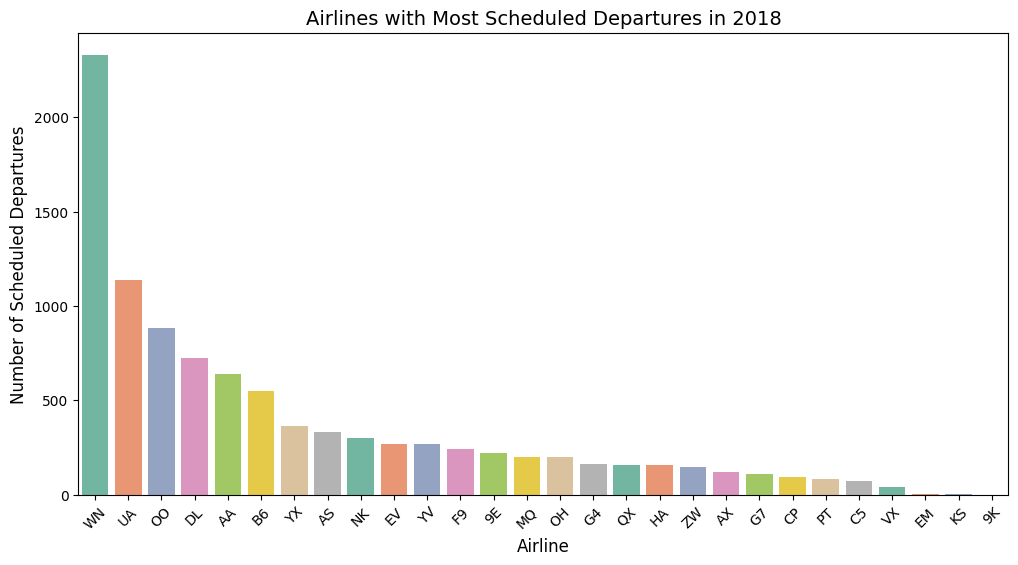

C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\386617871.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='Scheduled_Departures', data=airline_year_counts, palette="Set2")


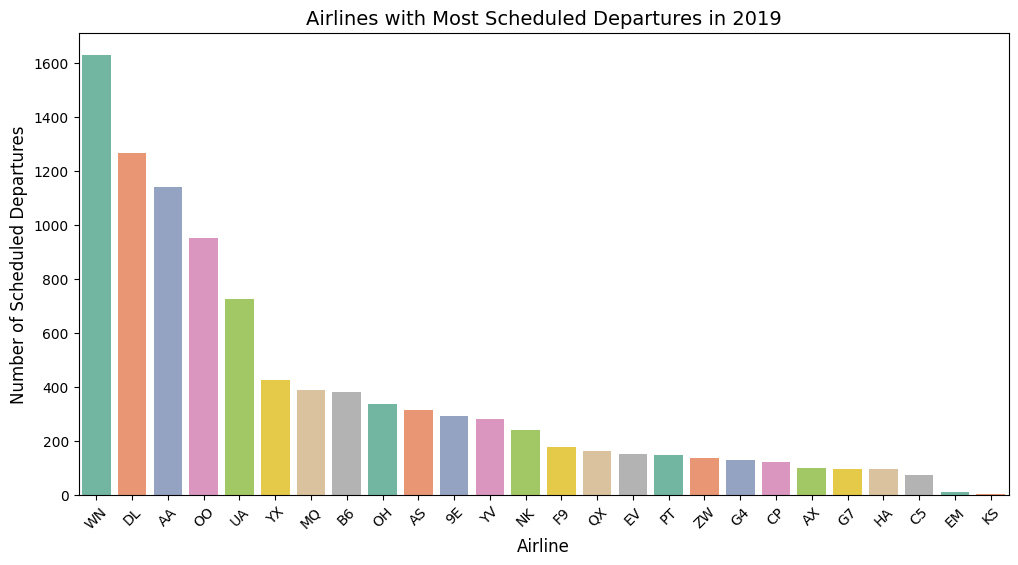

C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\386617871.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='Scheduled_Departures', data=airline_year_counts, palette="Set2")


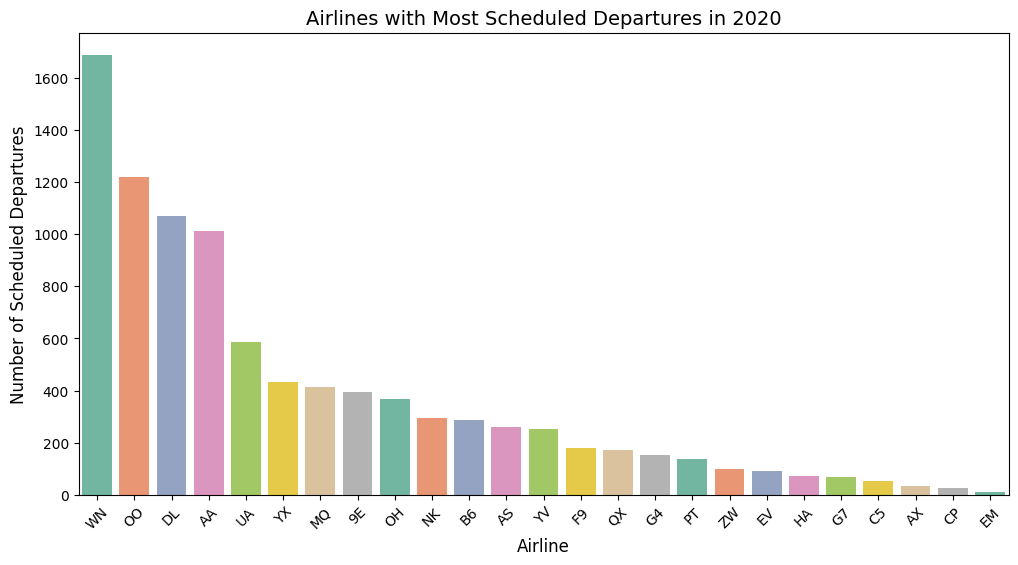

C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\386617871.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='Scheduled_Departures', data=airline_year_counts, palette="Set2")


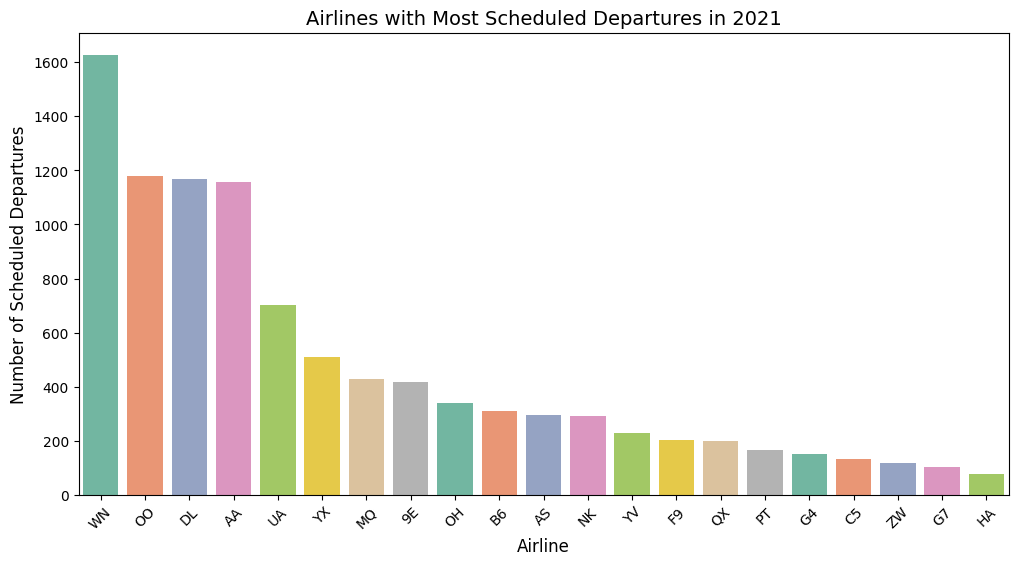

C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\386617871.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='Scheduled_Departures', data=airline_year_counts, palette="Set2")


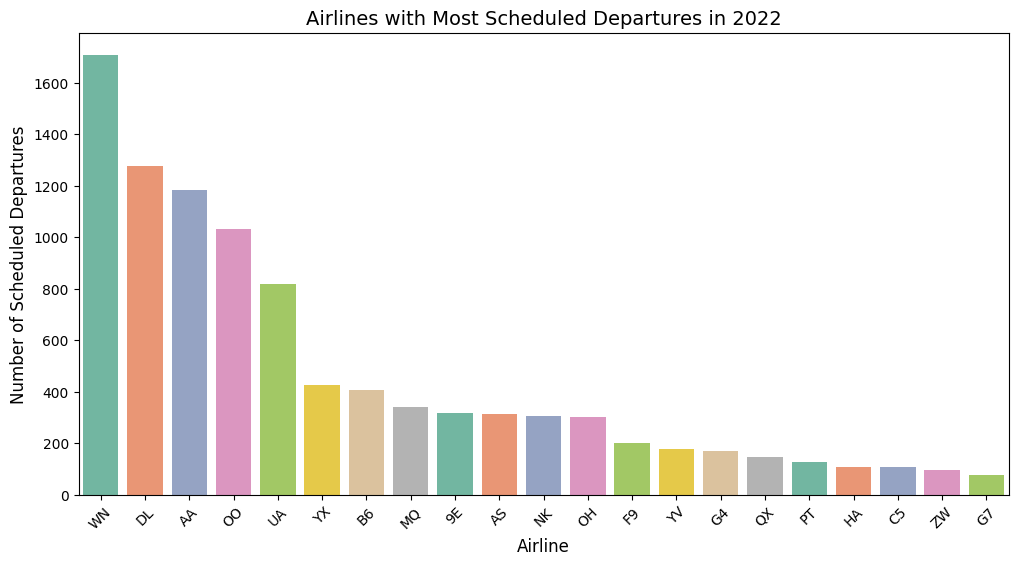

In [88]:

# List of unique years in your dataset
years = flightsinfo['Year'].unique()

# Set up the plot
for year in years:
    # Filter the data for the specific year
    airline_year_counts = flightsinfo[flightsinfo['Year'] == year].groupby('Operating_Airline')['CRSDepTime'].count().reset_index()
    
    # Rename columns for clarity
    airline_year_counts.columns = ['Airline', 'Scheduled_Departures']
    
    # Sort the data by number of scheduled departures in descending order
    airline_year_counts = airline_year_counts.sort_values(by='Scheduled_Departures', ascending=False)

    # Create a bar plot for the year
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Airline', y='Scheduled_Departures', data=airline_year_counts, palette="Set2")

    # Add labels & title
    plt.xlabel("Airline", fontsize=12)
    plt.ylabel("Number of Scheduled Departures", fontsize=12)
    plt.title(f"Airlines with Most Scheduled Departures in {year}", fontsize=14)
    plt.xticks(rotation=45)

    # Show the plot for each year
    plt.show()


C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\2275312543.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Operating_Airline', y='Delay_Percentage', data=delayed_by_airline_sorted, palette='Reds')


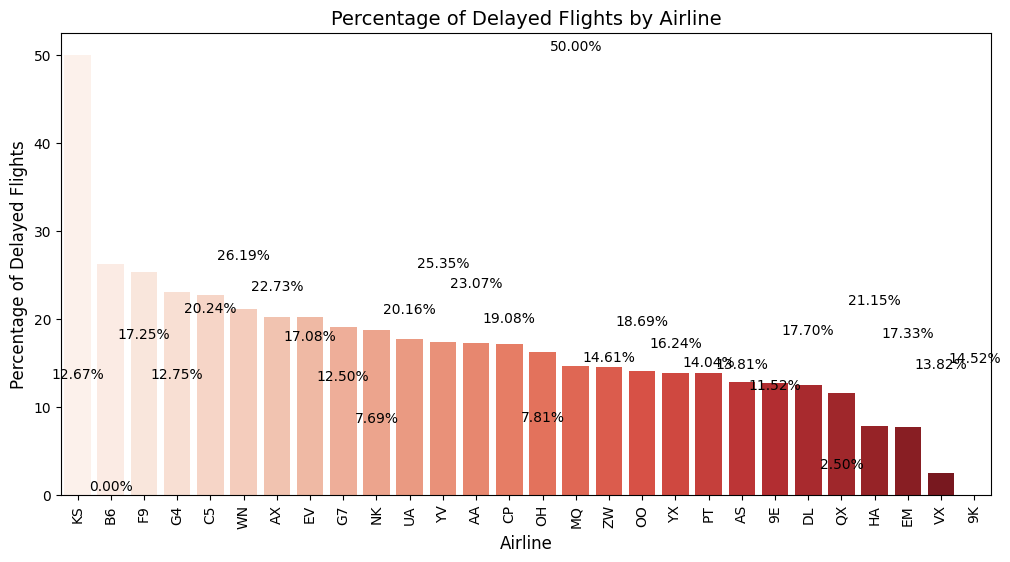

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by airline and count the number of delayed flights
delayed_by_airline = flightsinfo.groupby('Operating_Airline')['DepDel15'].sum().reset_index()

# Count total flights per airline
total_flights_by_airline = flightsinfo.groupby('Operating_Airline')['DepDel15'].count().reset_index()

# Merge both dataframes
delayed_by_airline = delayed_by_airline.merge(total_flights_by_airline, on='Operating_Airline', suffixes=('_delayed', '_total'))

# Calculate the percentage of delayed flights
delayed_by_airline['Delay_Percentage'] = (delayed_by_airline['DepDel15_delayed'] / delayed_by_airline['DepDel15_total']) * 100

# Sort airlines by delay percentage
delayed_by_airline_sorted = delayed_by_airline.sort_values(by='Delay_Percentage', ascending=False)

# Plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Operating_Airline', y='Delay_Percentage', data=delayed_by_airline_sorted, palette='Reds')

# Add data labels on bars
for index, row in delayed_by_airline_sorted.iterrows():
    plt.text(index, row.Delay_Percentage + 0.5, f"{row.Delay_Percentage:.2f}%", 
             ha='center', fontsize=10, color='black')

plt.xlabel("Airline", fontsize=12)
plt.ylabel("Percentage of Delayed Flights", fontsize=12)
plt.title("Percentage of Delayed Flights by Airline", fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()


C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\1470240786.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='Total_Arrival_Delay', data=airline_delays, palette="Blues_d")


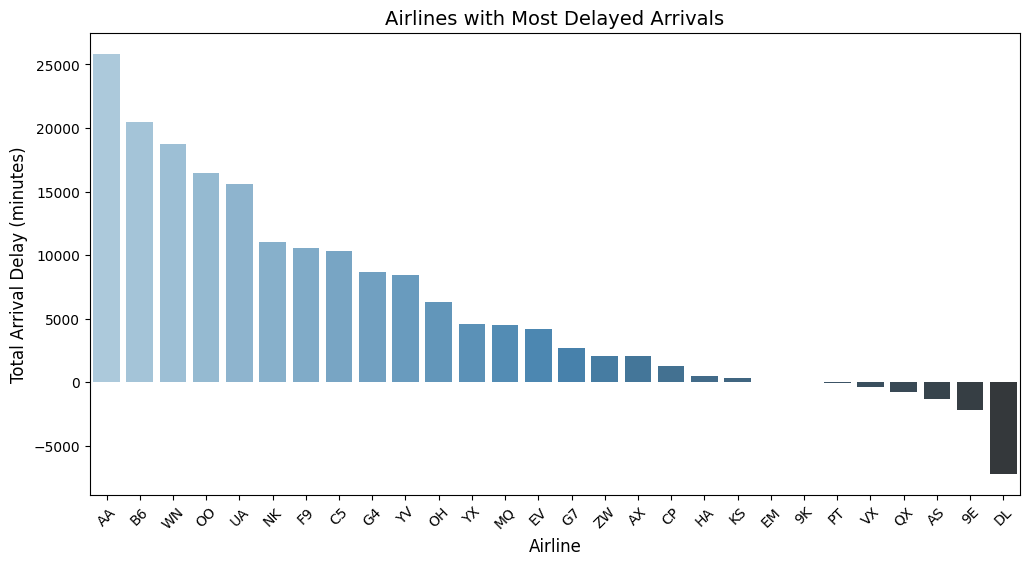

In [89]:
# Group by airline and sum the total delays across all years
airline_delays = flightsinfo.groupby('Operating_Airline')['ArrDelay'].sum().reset_index()

# Rename columns for clarity
airline_delays.columns = ['Airline', 'Total_Arrival_Delay']

# Sort by total arrival delay in descending order
airline_delays = airline_delays.sort_values(by='Total_Arrival_Delay', ascending=False)

# Set up the plot (bar chart)
plt.figure(figsize=(12, 6))

# Plot a bar chart for total delays by airline
sns.barplot(x='Airline', y='Total_Arrival_Delay', data=airline_delays, palette="Blues_d")

# Add labels & title
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Total Arrival Delay (minutes)", fontsize=12)
plt.title("Airlines with Most Delayed Arrivals", fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.show()


C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\2792241185.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='Total_Departure_Delay', data=airline_departure_delays, palette="Reds_d")


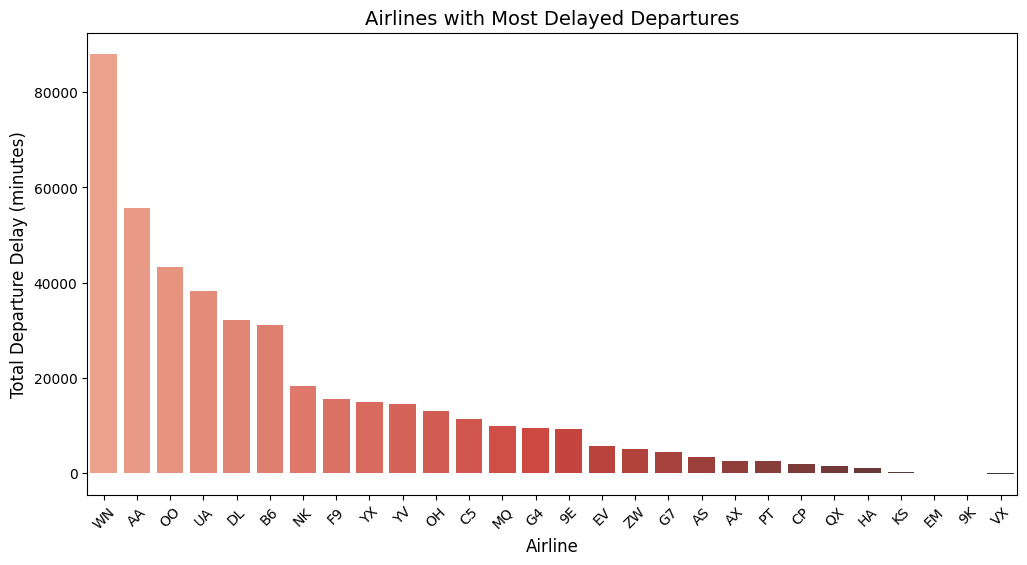

In [90]:
airline_departure_delays = flightsinfo.groupby('Operating_Airline')['DepDelay'].sum().reset_index()
airline_departure_delays.columns = ['Airline', 'Total_Departure_Delay']
airline_departure_delays = airline_departure_delays.sort_values(by='Total_Departure_Delay', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Total_Departure_Delay', data=airline_departure_delays, palette="Reds_d")

plt.xlabel("Airline", fontsize=12)
plt.ylabel("Total Departure Delay (minutes)", fontsize=12)
plt.title("Airlines with Most Delayed Departures", fontsize=14)
plt.xticks(rotation=45)

plt.show()


C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\2280511155.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='Abs_Diff_From_Median', data=airline_departure_delays_sorted, palette='Blues_d')


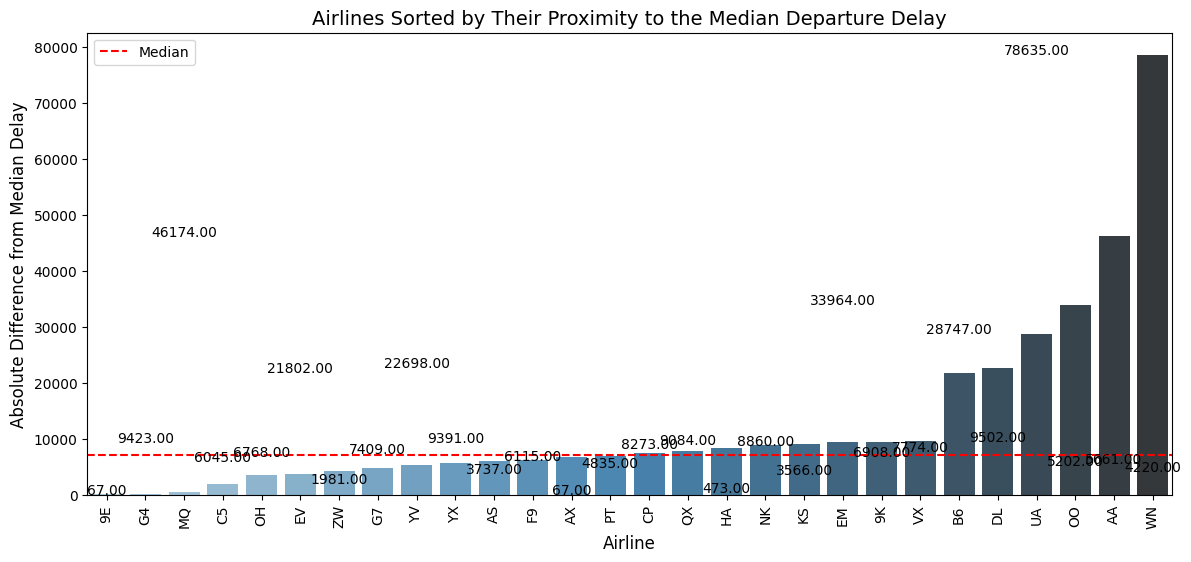

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by airline and sum the total departure delays
airline_departure_delays = flightsinfo.groupby('Operating_Airline')['DepDelay'].sum().reset_index()
airline_departure_delays.columns = ['Airline', 'Total_Departure_Delay']

# Calculate the median of the total departure delays
median_delay = airline_departure_delays['Total_Departure_Delay'].median()

# Calculate the absolute difference from the median
airline_departure_delays['Abs_Diff_From_Median'] = abs(airline_departure_delays['Total_Departure_Delay'] - median_delay)

# Sort the airlines by absolute difference from the median
airline_departure_delays_sorted = airline_departure_delays.sort_values(by='Abs_Diff_From_Median')

# Plot the bar graph showing how close each airline's total delay is to the median
plt.figure(figsize=(14, 6))
sns.barplot(x='Airline', y='Abs_Diff_From_Median', data=airline_departure_delays_sorted, palette='Blues_d')

# Add data labels on bars
for index, row in airline_departure_delays_sorted.iterrows():
    plt.text(index, row.Abs_Diff_From_Median + 0.5, f"{row.Abs_Diff_From_Median:.2f}", 
             ha='center', fontsize=10, color='black')

# Add a line for the median of absolute differences
plt.axhline(y=airline_departure_delays['Abs_Diff_From_Median'].median(), color='red', linestyle='--', label='Median')

# Labeling and title
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Absolute Difference from Median Delay", fontsize=12)
plt.title("Airlines Sorted by Their Proximity to the Median Departure Delay", fontsize=14)

# Add legend for the median line
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\2478558392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Operating_Airline', y='DepDelay', data=flightsinfo, palette="Set2")


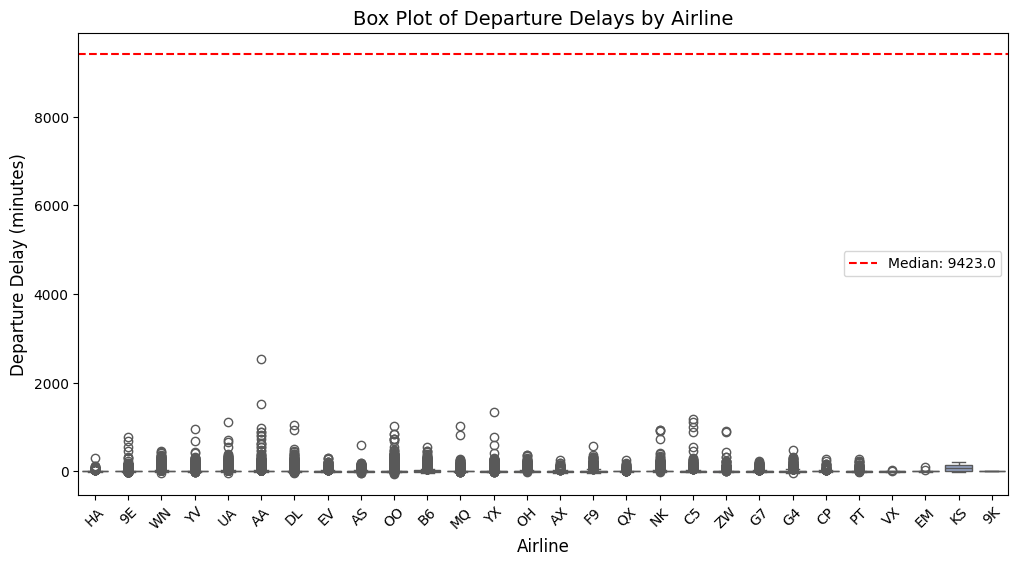

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Operating_Airline', y='DepDelay', data=flightsinfo, palette="Set2")
plt.axhline(y=median_delay, color='r', linestyle='--', label=f'Median: {median_delay}')
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Departure Delay (minutes)", fontsize=12)
plt.title("Box Plot of Departure Delays by Airline", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()


C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\1992348460.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Operating_Airline', y='Delay_Percentage', data=delayed_by_airline_sorted, palette='Reds_r')


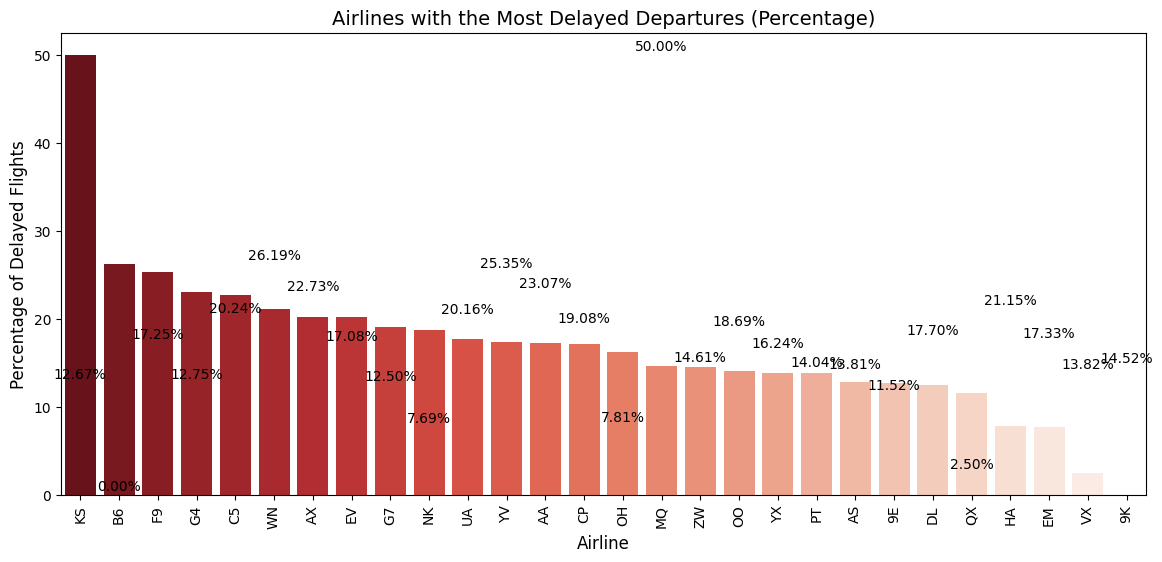

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by airline and count the number of delayed flights
delayed_by_airline = flightsinfo.groupby('Operating_Airline')['DepDel15'].sum().reset_index()

# Count total flights per airline
total_flights_by_airline = flightsinfo.groupby('Operating_Airline')['DepDel15'].count().reset_index()

# Merge both dataframes
delayed_by_airline = delayed_by_airline.merge(total_flights_by_airline, on='Operating_Airline', suffixes=('_delayed', '_total'))

# Calculate the percentage of delayed flights
delayed_by_airline['Delay_Percentage'] = (delayed_by_airline['DepDel15_delayed'] / delayed_by_airline['DepDel15_total']) * 100

# Sort airlines by delay percentage
delayed_by_airline_sorted = delayed_by_airline.sort_values(by='Delay_Percentage', ascending=False)

# Plot the bar graph showing the percentage of delayed flights for each airline with reversed color palette
plt.figure(figsize=(14, 6))
sns.barplot(x='Operating_Airline', y='Delay_Percentage', data=delayed_by_airline_sorted, palette='Reds_r')

# Add data labels on bars
for index, row in delayed_by_airline_sorted.iterrows():
    plt.text(index, row.Delay_Percentage + 0.5, f"{row.Delay_Percentage:.2f}%", ha='center', fontsize=10, color='black')

plt.xlabel("Airline", fontsize=12)
plt.ylabel("Percentage of Delayed Flights", fontsize=12)
plt.title("Airlines with the Most Delayed Departures (Percentage)", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


Airlines with Zero Total Departure Delays Across All Flights

In [75]:
# Group by destination and count the number of delayed flights
delayed_by_dest = flightsinfo.groupby('DestCityName')['DepDel15'].sum().reset_index()

# Count total flights per destination
total_flights_by_dest = flightsinfo.groupby('DestCityName')['DepDel15'].count().reset_index()

# Merge both dataframes
delayed_by_dest = delayed_by_dest.merge(total_flights_by_dest, on='DestCityName', suffixes=('_delayed', '_total'))

# Calculate percentage of delayed flights
delayed_by_dest['Delay_Percentage'] = (delayed_by_dest['DepDel15_delayed'] / delayed_by_dest['DepDel15_total']) * 100

# Sort the cities by percentage of delayed flights
delayed_by_dest_sorted = delayed_by_dest.sort_values(by='Delay_Percentage', ascending=False)

# Print the top cities with the highest percentage of delayed flights
print(delayed_by_dest_sorted[['DestCityName', 'Delay_Percentage']].head(10))


           DestCityName  Delay_Percentage
61             Cheyenne        100.000000
96                 Elko        100.000000
2           Adak Island        100.000000
86            Dickinson         75.000000
302         Santa Maria         66.666667
167             Kearney         66.666667
225            Muskegon         50.000000
262               Ponce         50.000000
137  Hattiesburg/Laurel         50.000000
28           Belleville         50.000000


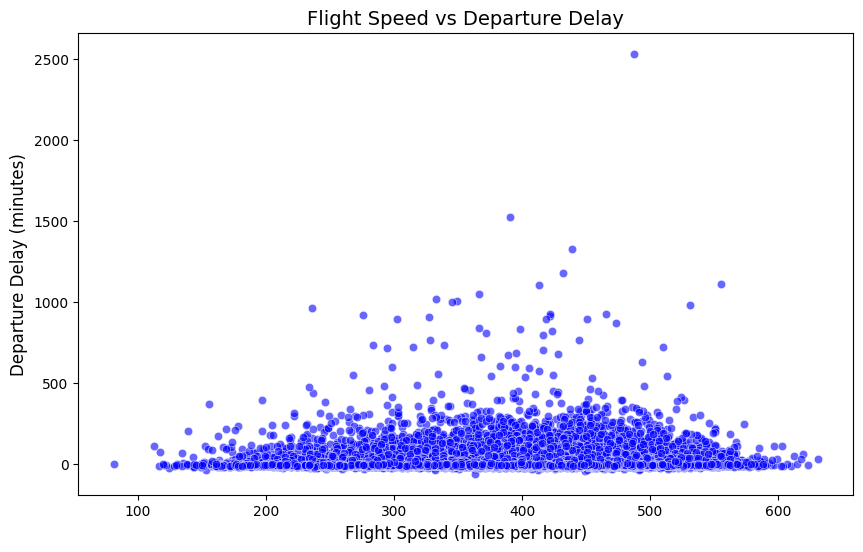

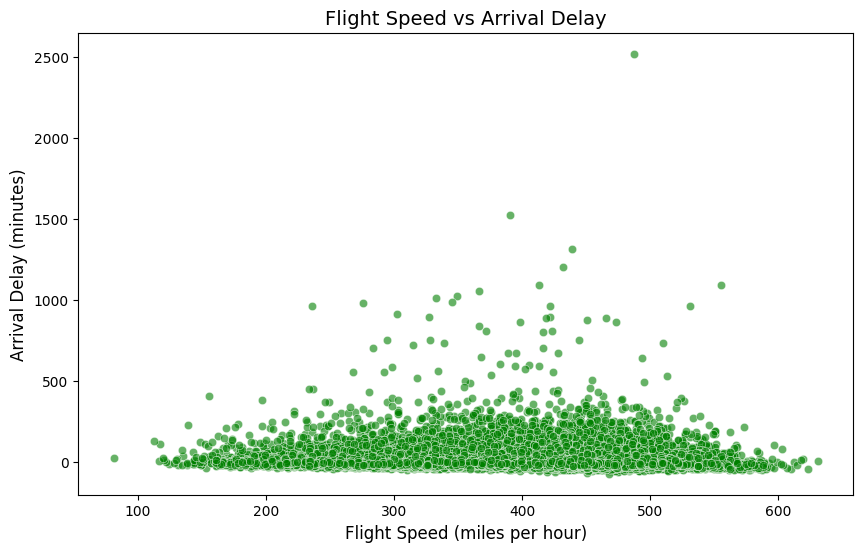

Correlation between Flight Speed and Departure Delay: 0.01
Correlation between Flight Speed and Arrival Delay: -0.05


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate flight speed (miles per hour) for each flight
flightsinfo['Flight_Speed'] = (flightsinfo['Distance'] / flightsinfo['AirTime']) * 60

# Scatter plot to visualize the relationship between flight speed and departure delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight_Speed', y='DepDelay', data=flightsinfo, color='blue', alpha=0.6)
plt.title("Flight Speed vs Departure Delay", fontsize=14)
plt.xlabel("Flight Speed (miles per hour)", fontsize=12)
plt.ylabel("Departure Delay (minutes)", fontsize=12)
plt.show()

# Scatter plot to visualize the relationship between flight speed and arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight_Speed', y='ArrDelay', data=flightsinfo, color='green', alpha=0.6)
plt.title("Flight Speed vs Arrival Delay", fontsize=14)
plt.xlabel("Flight Speed (miles per hour)", fontsize=12)
plt.ylabel("Arrival Delay (minutes)", fontsize=12)
plt.show()

# Calculate correlation between flight speed and departure delay
departure_delay_corr = flightsinfo[['Flight_Speed', 'DepDelay']].corr().iloc[0, 1]
print(f"Correlation between Flight Speed and Departure Delay: {departure_delay_corr:.2f}")

# Calculate correlation between flight speed and arrival delay
arrival_delay_corr = flightsinfo[['Flight_Speed', 'ArrDelay']].corr().iloc[0, 1]
print(f"Correlation between Flight Speed and Arrival Delay: {arrival_delay_corr:.2f}")


                      DepDelay  ArrDelay
DepDelay              1.000000  0.960987
DepDelayMinutes       0.996818  0.958165
ArrDelayMinutes       0.973562  0.981053
ArrDelay              0.960987  1.000000
DepartureDelayGroups  0.842696  0.812781
ArrivalDelayGroups    0.787982  0.857419
DepDel15              0.576351  0.557878
ArrDel15              0.530115  0.600321
Delayed               0.530115  0.600321
DepTime               0.118957  0.116566


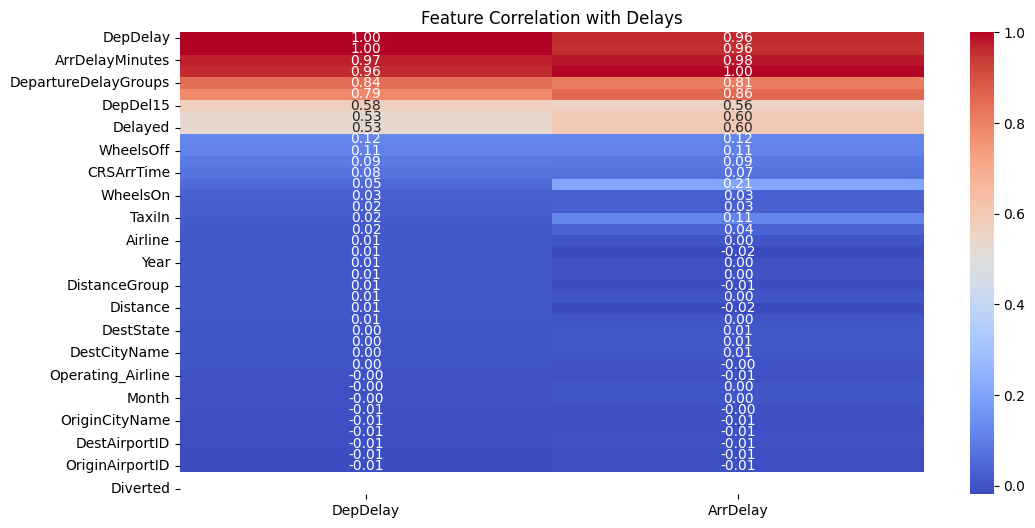

In [76]:
# Selecting numerical and categorical columns
numerical_cols = flightsinfo.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = flightsinfo.select_dtypes(include=['object']).columns.tolist()

# Encoding categorical columns using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    flightsinfo[col] = label_encoders[col].fit_transform(flightsinfo[col])

# Compute correlation matrix
correlation_matrix = flightsinfo.corr()

# Extract correlations of delay columns
delay_correlations = correlation_matrix[['DepDelay', 'ArrDelay']].sort_values(by=['DepDelay', 'ArrDelay'], ascending=False)

# Display top correlated features
print(delay_correlations.head(10))

# Plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(delay_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Delays")
plt.show()


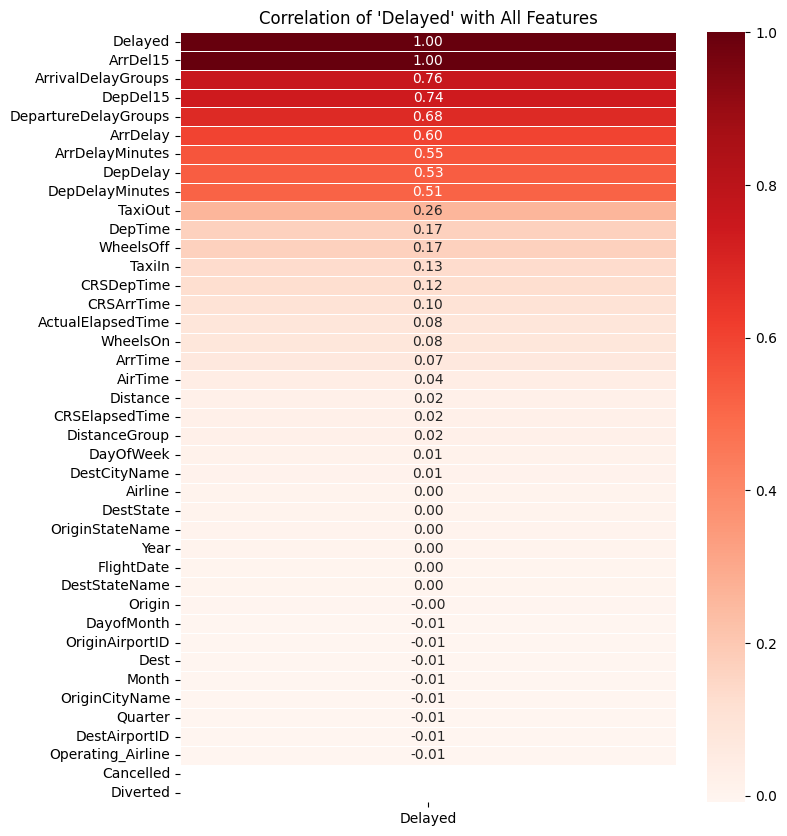

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Identify categorical and numerical columns
numerical_cols = flightsinfo.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = flightsinfo.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    flightsinfo[col] = label_encoders[col].fit_transform(flightsinfo[col])

# Compute correlation of 'Delayed' with all columns
delayed_correlation = flightsinfo.corr()[["Delayed"]].sort_values(by="Delayed", ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(delayed_correlation, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)

plt.title("Correlation of 'Delayed' with All Features")
plt.show()


C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\883944704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="Delay_Percentage", data=monthly_delays, palette="Reds")


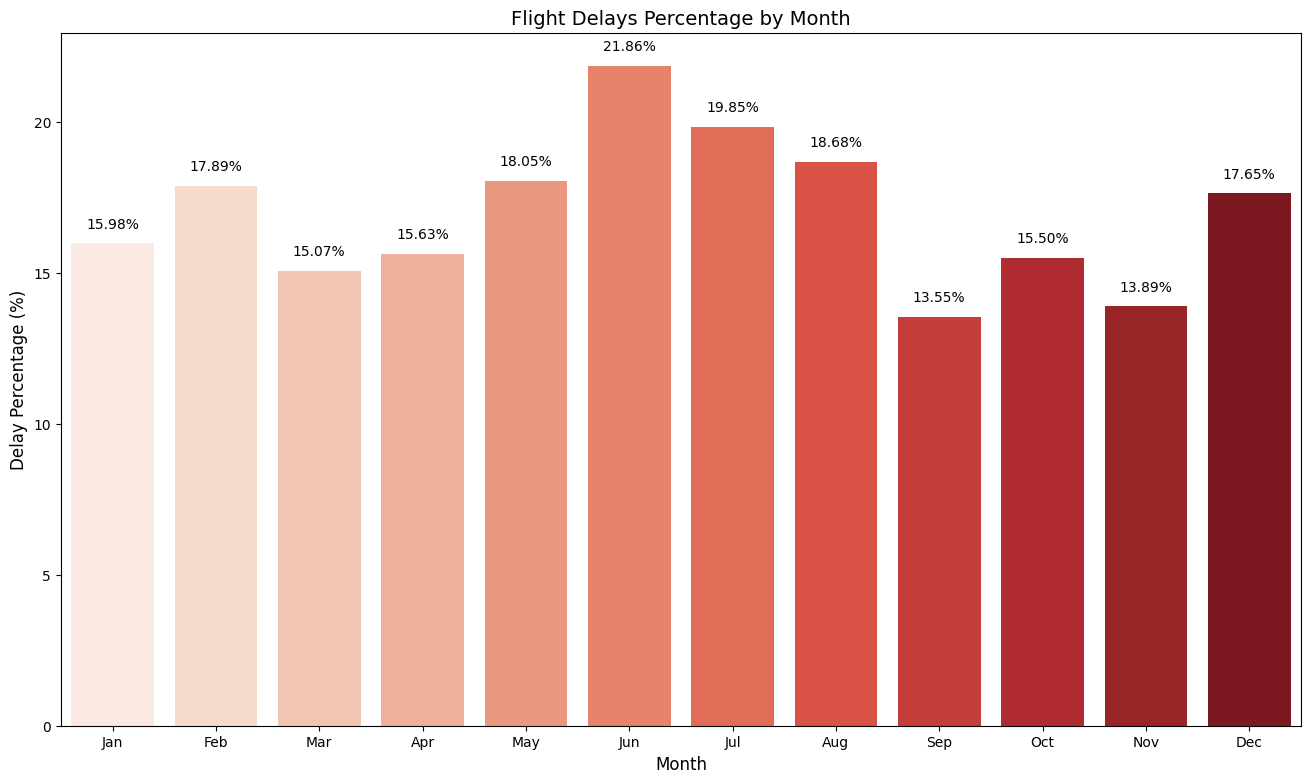

In [58]:
plt.figure(figsize=(16, 9))

# Plot the bar chart with shaded red colors
sns.barplot(x="Month", y="Delay_Percentage", data=monthly_delays, palette="Reds")

# Add percentage values as data points on the bars
for index, row in monthly_delays.iterrows():
    plt.text(row.Month - 1, row.Delay_Percentage + 0.5, f"{row.Delay_Percentage:.2f}%", 
             ha='center', fontsize=10, color='black')

plt.xlabel("Month", fontsize=12)
plt.ylabel("Delay Percentage (%)", fontsize=12)
plt.title("Flight Delays Percentage by Month", fontsize=14)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()


C:\Users\Hites\AppData\Local\Temp\ipykernel_8088\2646271716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DayOfWeek", y="Delay_Percentage", data=daily_delays, palette="Reds")


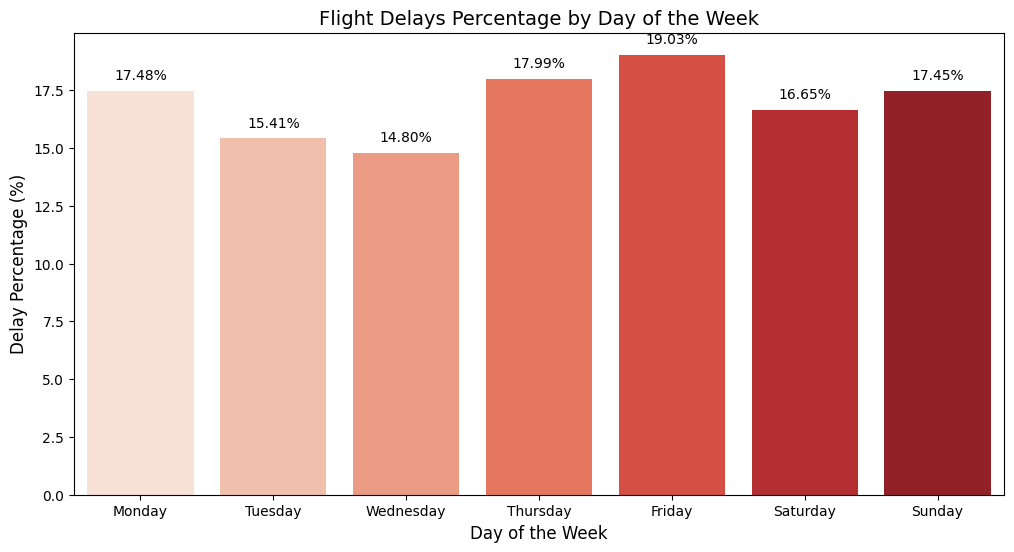

In [59]:
daily_delays = flightsinfo.groupby("DayOfWeek")["DepDel15"].sum().reset_index()
total_flights_per_day = flightsinfo.groupby("DayOfWeek")["DepDel15"].count().reset_index()
daily_delays = daily_delays.merge(total_flights_per_day, on="DayOfWeek", suffixes=("_delayed", "_total"))
daily_delays["Delay_Percentage"] = (daily_delays["DepDel15_delayed"] / daily_delays["DepDel15_total"]) * 100
daily_delays = daily_delays.sort_values(by="Delay_Percentage", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="DayOfWeek", y="Delay_Percentage", data=daily_delays, palette="Reds")

for index, row in daily_delays.iterrows():
    plt.text(row.DayOfWeek - 1, row.Delay_Percentage + 0.5, f"{row.Delay_Percentage:.2f}%", 
             ha='center', fontsize=10, color='black')

plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Delay Percentage (%)", fontsize=12)
plt.title("Flight Delays Percentage by Day of the Week", fontsize=14)
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()


In [60]:
# Group by destination and count the number of delayed flights
delayed_by_dest = flightsinfo.groupby('DestCityName')['DepDel15'].sum().reset_index()

# Count total flights per destination
total_flights_by_dest = flightsinfo.groupby('DestCityName')['DepDel15'].count().reset_index()

# Merge both dataframes
delayed_by_dest = delayed_by_dest.merge(total_flights_by_dest, on='DestCityName', suffixes=('_delayed', '_total'))

# Calculate percentage of delayed flights
delayed_by_dest['Delay_Percentage'] = (delayed_by_dest['DepDel15_delayed'] / delayed_by_dest['DepDel15_total']) * 100

# Sort the cities by percentage of delayed flights
delayed_by_dest_sorted = delayed_by_dest.sort_values(by='Delay_Percentage', ascending=False)

# Print the top cities with the highest percentage of delayed flights
print(delayed_by_dest_sorted[['DestCityName', 'Delay_Percentage']].head(10))


     DestCityName  Delay_Percentage
61             61        100.000000
96             96        100.000000
2               2        100.000000
86             86         75.000000
302           302         66.666667
167           167         66.666667
225           225         50.000000
262           262         50.000000
137           137         50.000000
28             28         50.000000


                      CRSDepTime   DepTime  DepDelayMinutes  DepDelay  \
CRSDepTime              1.000000  0.963042         0.086577  0.090991   
DepTime                 0.963042  1.000000         0.112334  0.118957   
DepDelayMinutes         0.086577  0.112334         1.000000  0.996818   
DepDelay                0.090991  0.118957         0.996818  1.000000   
ArrTime                 0.631768  0.651776         0.017023  0.022081   
ArrDelayMinutes         0.078064  0.103092         0.977977  0.973562   
AirTime                -0.016285 -0.021196         0.000921  0.006901   
CRSElapsedTime         -0.018985 -0.023993         0.004423  0.010036   
ActualElapsedTime      -0.018325 -0.021876         0.009833  0.015311   
Distance               -0.011019 -0.017959         0.000372  0.006871   
Year                    0.004819  0.004588         0.006819  0.008913   
Quarter                -0.015533 -0.015915        -0.005446 -0.004645   
Month                  -0.014759 -0.015283        -

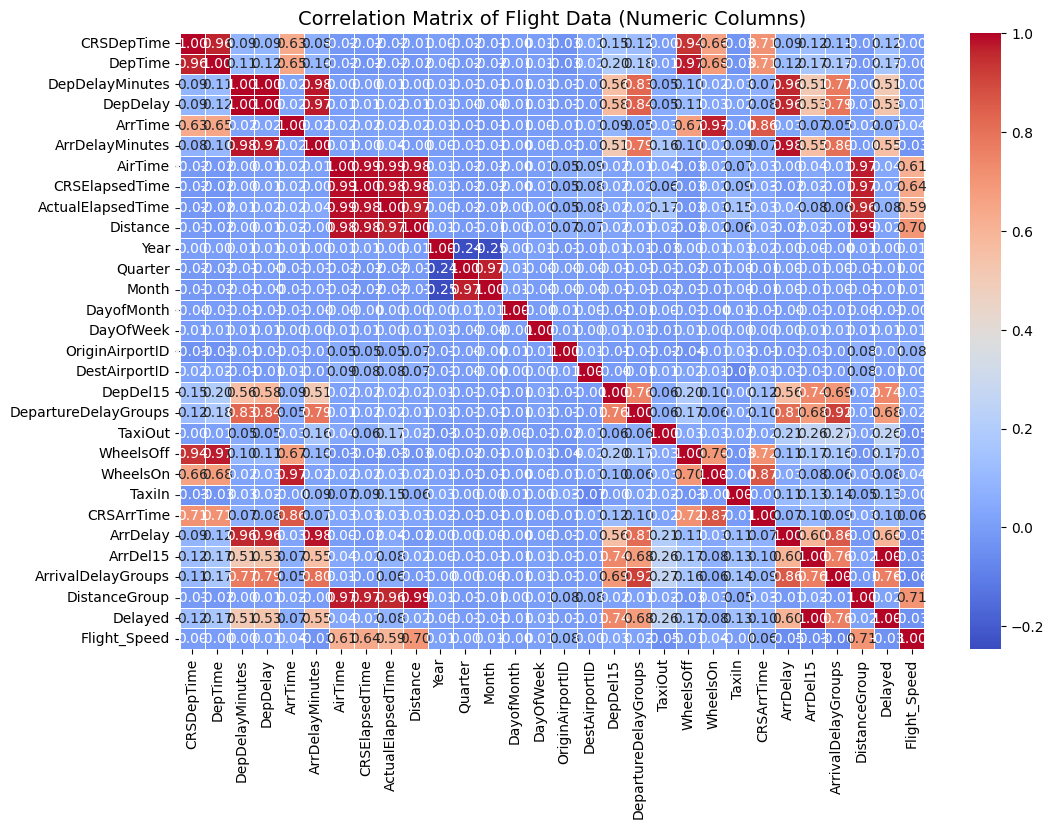

In [102]:
# Select only numeric columns from the dataset
numeric_columns = flightsinfo.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix as a heatmap for better readability
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Flight Data (Numeric Columns)", fontsize=14)
plt.show()
